In [1]:
!pip install pandas
!pip install accelerate
!pip install transformers
import accelerate
import torch
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset
import numpy as np
from torch.utils.data import TensorDataset
from transformers import TrainingArguments, Trainer
import matplotlib.pyplot as plt

In [2]:
# from google.colab import files
# import pandas as pd

# uploaded = files.upload()

In [3]:
# import pandas as pd

# json_file1 = '/content/PromiseEval_Sample_Trainset_English.json'
# json_file2=  '/content/PromiseEval_Trainset_English.json'
# csv_file = '/content/data.csv'  # Replace with your desired CSV file name

# # Read the JSON file
# df1 = pd.read_json(json_file1)
# df2 = pd.read_json(json_file2)

# # Concatenate the DataFrames
# df = pd.concat([df1, df2], ignore_index=True)

# # Convert to CSV
# df.to_csv(csv_file, index=False)
# df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
# df['promise_status'] = df['promise_status'].replace({'Yes': 1, 'No': 0})
# df['evidence_status'] = df['evidence_status'].replace({'Yes': 1, 'No': 0})
# print(f'JSON has been successfully converted to CSV: {csv_file}')


In [4]:
# !pip -q install google-generativeai==0.3.0
# !pip -q install google-ai-generativelanguage==0.4.0

# import google.generativeai as genai
# from google.colab import userdata
# import pandas as pd

# from IPython.display import display
# from IPython.display import Markdown

# GOOGLE_AI_STUDIO = userdata.get('GOOGLE_API')

# genai.configure(api_key=GOOGLE_AI_STUDIO)

In [5]:
# for m in genai.list_models():
#     if 'generateContent' in m.supported_generation_methods:
#         print(m.name)

# models = genai.GenerativeModel('gemini-1.5-flash-002')

In [6]:
# ver_df = df.copy()
# qua_df = df.copy()
# df

In [ ]:
import pandas as pd
import time
from collections import Counter

roles = [
    ("Misleading", 9)
]

roles_dict = dict(roles)
generated_counts = Counter()


dff = ver_df.copy()
generated_sentences = []
generated_evidence = []
generated_quality = []

for index, row in dff.iterrows():
    sentence = row['data']
    evidence = row['evidence_status']
    quality = row['evidence_quality']

    if generated_counts[quality] >= 200:
            continue
    if index < 600 and quality in roles_dict:
        if quality == "Misleading":
            loop_count = 0
            while generated_counts[quality] < 200 and loop_count < 15:

                time.sleep(5)

                

                response = models.generate_content([
                    f"Paraphrase the following sentence: '{sentence}' "
                    f"The sentence should reflect the following evidence status:'{evidence}'. "
                    f"The sentence should reflect the following evidence quality: '{quality}'. "
                    f"Each sentence should be exactly 500 characters including the entity name."
                    f"Do not start with a number or special character."
                ])





                if response.parts:
                    sen = response.text.strip()
                    if len(sen) > 300:
                        print('agaya')
                        generated_sentences.append(sen)
                        generated_evidence.append(evidence)
                        generated_quality.append(quality)
                        generated_counts[quality] += 1
                        loop_count += 1


In [8]:
# generated = pd.DataFrame({
#     'data': generated_sentences,
#     'evidence_status': generated_evidence,
#     'evidence_quality': generated_quality
# })

# print("Generated Counts:", generated_counts)

# generated

In [9]:
# # prompt: concat two dfs vertically

# # Concatenate the original DataFrame 'dff' with the generated DataFrame 'generated'
# final_df = pd.concat([dff, generated], ignore_index=True)
# final_df = final_df.sample(frac=1).reset_index(drop=True)
# final_df = final_df.drop(['URL', 'page_number', 'promise_status', 'verification_timeline'], axis=1, errors='ignore')
# final_df

In [10]:
# final_df['evidence_quality'].value_counts()

In [11]:
# qua_df = final_df.copy()

# qua_df['evidence_quality'] = qua_df['evidence_quality'].str.strip()
# df_bin = pd.get_dummies(qua_df['evidence_quality'])
# qdf_final = pd.concat([qua_df, df_bin], axis=1)
# qdf_final = qdf_final.drop('evidence_quality', axis=1)
# bool_cols = qdf_final.select_dtypes(include='bool').columns
# qdf_final[bool_cols] = qdf_final[bool_cols].astype(int)
# qdf_final

In [12]:

qdf_final = pd.read_csv('/content/q_aug_data.csv')
qdf_final

,data,evidence_status,Clear,Misleading,N/A,Not Clear
0,Career development Regular feedback and meanin...,1,1,0,0,0
1,Our company claims to report all environmental...,1,0,1,0,0
2,"“Transparency, humility and collaboration are ...",1,0,0,0,1
3,Canada Nickel's claim of prioritizing communit...,1,0,1,0,0
4,Kering Generation Awardgenerating changeTo tap...,1,1,0,0,0
...,...,...,...,...,...,...
730,Arabi MobiCash and Point of Sale – we continue...,0,0,0,1,0
731,Accountable and transparent every step of the ...,1,1,0,0,0
732,Regenerative Fund for Nature Fundación Global ...,1,0,0,0,1
733,Arabi Junior App – this digital ﬁnancial platf...,0,0,0,1,0


In [13]:
# qdf_final.to_csv('/content/q_aug_data.csv' , index=False)
# vdf_final.to_csv('/content/vdata.csv' , index=False)

In [14]:
label_df = qdf_final[['data','evidence_status','Clear', 'Misleading', 'N/A', 'Not Clear']]
label_df

,data,evidence_status,Clear,Misleading,N/A,Not Clear
0,Career development Regular feedback and meanin...,1,1,0,0,0
1,Our company claims to report all environmental...,1,0,1,0,0
2,"“Transparency, humility and collaboration are ...",1,0,0,0,1
3,Canada Nickel's claim of prioritizing communit...,1,0,1,0,0
4,Kering Generation Awardgenerating changeTo tap...,1,1,0,0,0
...,...,...,...,...,...,...
730,Arabi MobiCash and Point of Sale – we continue...,0,0,0,1,0
731,Accountable and transparent every step of the ...,1,1,0,0,0
732,Regenerative Fund for Nature Fundación Global ...,1,0,0,0,1
733,Arabi Junior App – this digital ﬁnancial platf...,0,0,0,1,0


In [15]:
train_df = label_df[:600]
validation_df = label_df[600:670]
test_df = label_df[670:]
train_labels_df = label_df[:600]
validation_labels_df = label_df[600:670]
test_labels_df = label_df[670:]

In [16]:
train_sentences = train_df['data'].values.tolist()
train_labels = train_labels_df.iloc[:, 1:].values
train_labels = train_labels.astype(np.float32)

validation_sentences = validation_df['data'].values.tolist()
validation_labels = validation_labels_df.iloc[:, 1:].values
validation_labels = validation_labels.astype(np.float32)

In [17]:
# from transformers import AutoTokenizer

# checkpoint = "xlm-roberta-base"
# tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# model = BertForSequenceClassification.from_pretrained(checkpoint, num_labels=6, problem_type="multi_label_classification")
# model

from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "microsoft/deberta-v3-base"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=5, problem_type="multi_label_classification")
model

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DebertaV2ForSequenceClassification(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 768, padding_idx=0)
      (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
      (dropout): StableDropout()
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=768, out_features=768, bias=True)
              (key_proj): Linear(in_features=768, out_features=768, bias=True)
              (value_proj): Linear(in_features=768, out_features=768, bias=True)
              (pos_dropout): StableDropout()
              (dropout): StableDropout()
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine

In [18]:
class ArgDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [19]:
train_encodings = tokenizer(train_sentences, padding = True, truncation = True, max_length = 512)
train_dataset = ArgDataset(train_encodings, train_labels)

validation_encodings = tokenizer(validation_sentences, padding = True, truncation = True, max_length = 512)
validation_dataset = ArgDataset(validation_encodings, validation_labels)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

label_names = train_labels_df.columns[1:].tolist()

def compute_metrics(pred):
    labels = pred.label_ids
    preds = (pred.predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average='weighted', zero_division=0)
    recall = recall_score(labels, preds, average='weighted', zero_division=0)
    f1 = f1_score(labels, preds, average='weighted', zero_division=0)

    # Generate classification report
    # report = classification_report(labels, preds, target_names=label_names, zero_division=0)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        # 'classification_report': report
    }


In [21]:
import wandb
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir=".",
    eval_strategy="epoch",
    logging_dir="./logs",
    save_strategy="epoch",
    num_train_epochs = 8,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    load_best_model_at_end=True,
    weight_decay=0.01,
    learning_rate = 8e-6,
    warmup_steps = 30,
    report_to = [],
    logging_steps= 100,
    metric_for_best_model="f1"
)

wandb.init(mode="disabled")


In [22]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.548452,0.000000,0.277624,0.359649,0.313358
2,0.616000,0.415290,0.385714,0.670148,0.517544,0.577193
3,0.426600,0.383137,0.485714,0.741986,0.640351,0.665973
4,0.340200,0.354396,0.614286,0.738542,0.701754,0.717584
5,0.340200,0.358819,0.600000,0.741795,0.675439,0.703781
6,0.273100,0.365032,0.557143,0.737826,0.649123,0.683407
7,0.238200,0.373659,0.600000,0.736392,0.675439,0.703290
8,0.210700,0.373361,0.614286,0.718546,0.692982,0.705261


TrainOutput(global_step=600, training_loss=0.3508015823364258, metrics={'train_runtime': 949.7868, 'train_samples_per_second': 5.054, 'train_steps_per_second': 0.632, 'total_flos': 1262989733068800.0, 'train_loss': 0.3508015823364258, 'epoch': 8.0})

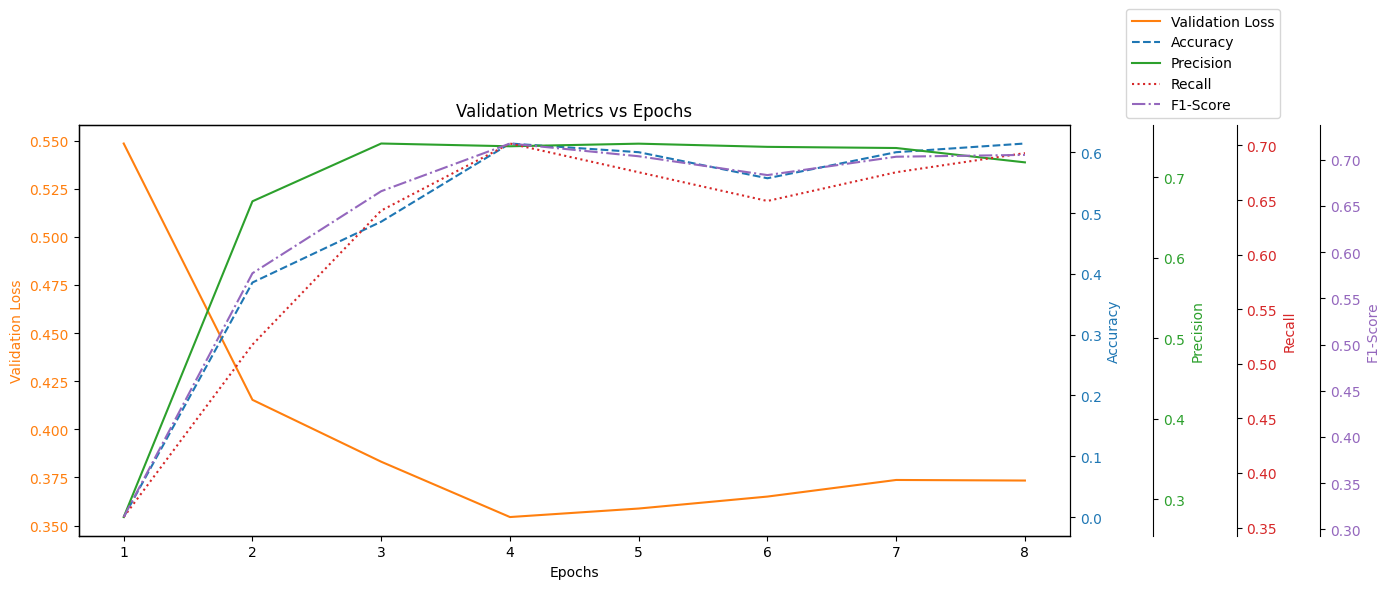

In [23]:
import matplotlib.pyplot as plt

# Extract the log history from the trainer
log_history = trainer.state.log_history

# Initialize lists for storing values
losses = []
accuracies = []
precisions = []
f1_scores = []
recalls = []

# Parse through the log history and extract values
for entry in log_history:
    if 'eval_loss' in entry and 'eval_accuracy' in entry and 'eval_precision' in entry and 'eval_recall' in entry and 'eval_f1' in entry:
        losses.append(entry['eval_loss'])
        accuracies.append(entry['eval_accuracy'])
        precisions.append(entry['eval_precision'])
        f1_scores.append(entry['eval_f1'])
        recalls.append(entry['eval_recall'])

# Define epochs (adjust based on your actual epoch range)
epochs = list(range(1, len(losses) + 1))

# Create a figure and axis for plotting
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot the first metric (loss) on the primary y-axis
ax1.plot(epochs, losses, color='tab:orange', label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Validation Loss', color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')

# Create a secondary y-axis for Accuracy
ax2 = ax1.twinx()
ax2.plot(epochs, accuracies, color='tab:blue', linestyle='--', label='Accuracy')
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Create a tertiary y-axis for Precision
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
ax3.plot(epochs, precisions, color='tab:green', linestyle='-', label='Precision')
ax3.set_ylabel('Precision', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Create a fourth y-axis for Recall
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))  # Offset the fourth y-axis
ax4.plot(epochs, recalls, color='tab:red', linestyle=':', label='Recall')
ax4.set_ylabel('Recall', color='tab:red')
ax4.tick_params(axis='y', labelcolor='tab:red')

# Create a fifth y-axis for F1-score
ax5 = ax1.twinx()
ax5.spines['right'].set_position(('outward', 180))  # Offset the fifth y-axis
ax5.plot(epochs, f1_scores, color='tab:purple', linestyle='-.', label='F1-Score')
ax5.set_ylabel('F1-Score', color='tab:purple')
ax5.tick_params(axis='y', labelcolor='tab:purple')

# Add legends for each line
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
lines5, labels5 = ax5.get_legend_handles_labels()

ax2.legend(lines1 + lines2 + lines3 + lines4 + lines5,
           labels1 + labels2 + labels3 + labels4 + labels5,
           loc='lower left', bbox_to_anchor=(1.05, 1))

# Title and grid
plt.title('Validation Metrics vs Epochs')
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()


In [25]:
model.save_pretrained("/content/")
model = AutoModelForSequenceClassification.from_pretrained("/content/")

In [26]:
test_df.insert(0, 'Index', range(1, len(test_labels_df) + 1))
test_labels_df.insert(0, 'Index', range(1, len(test_labels_df) + 1))
test_labels_df

,Index,data,evidence_status,Clear,Misleading,N/A,Not Clear
670,1,Monitoring With our operations currently limit...,0,0,0,1,0
671,2,Company X claims an ESG strategy focused on th...,1,0,1,0,0
672,3,CORPORATE AND INSTITUTIONAL BANKING Providing ...,0,0,0,1,0
673,4,Materiality assessment In the ﬁrst half of 202...,1,0,0,0,1
674,5,OUR COMMITMENT TO HUMAN RIGHTS We respect inte...,1,1,0,0,0
...,...,...,...,...,...,...,...
730,61,Arabi MobiCash and Point of Sale – we continue...,0,0,0,1,0
731,62,Accountable and transparent every step of the ...,1,1,0,0,0
732,63,Regenerative Fund for Nature Fundación Global ...,1,0,0,0,1
733,64,Arabi Junior App – this digital ﬁnancial platf...,0,0,0,1,0


In [27]:
predictions = []
threshold = 0.4

for idx, row in test_df.iterrows():
    arg_id = row['Index']
    text = row['data']
    encoding = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**encoding)

    sigmoid = torch.nn.Sigmoid()
    predictions_tensor = sigmoid(outputs.logits)

    predicted_labels = []
    for prob in predictions_tensor.flatten():
        if prob >= threshold:
          label = 1
        else:
          label =  0
        predicted_labels.append(label)

    predictions.append([arg_id] + predicted_labels)

data = {'Index': [entry[0] for entry in predictions]}

for i, label in enumerate(test_labels_df.columns[2:]):
    data[label] = [entry[i+1] for entry in predictions]
predictions_df = pd.DataFrame(data)


In [28]:
true_pred = test_labels_df[['Index','evidence_status','Clear', 'Misleading', 'N/A', 'Not Clear']]

In [29]:
true_labels = true_pred[['Clear', 'Misleading', 'N/A', 'Not Clear']]
pred_labels = predictions_df[['Clear', 'Misleading', 'N/A', 'Not Clear']]

f1_average = f1_score(true_labels, pred_labels, average='macro')
print(f"Average F1 Score: {f1_average}")

Average F1 Score: 0.5981884057971014
